# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko


 * [Numpy,Scipy,Scikit-image를 통한 기본 영상 처리4](#Numpy,Scipy,Scikit-image를-통한-기본-영상-처리4) 
     * [ 수업 내용](#수업-내용)
     * [채널 분리  ](#채널-분리 )
        * [matplotlib  ](#matplotlib )
     * [도형 그리기](#도형-그리기)
        * [ImageDraw  ](#ImageDraw)
            * [원  ](#원 )
            * [사각형 ](#사각형 )
     * [PIL: meta data](#meta-data)
         * [\_getexif](#_getexif)
     * [확장자  ](#확장자 )
         * [png  ](#png )
     * [opencv  ](#opencv )
     * [Numpy 그림 그리기](#Numpy-그림-그리기)
        * [좌표축 만들기  ](#좌표축-만들기 )     
        * [그림-그리기](#그림-그리기)

---
## Numpy,Scipy,Scikit-image를 통한 기본 영상 처리4
## 수업 내용
- **Numpy** 활용해서 기본적인 영상처리
1. ML/DL 을 위한 이미지 **데이터 셋 구축**
    - imread 
    - 이미지 크기: crop, resize, rescale
        - object detection/segmentation 이용해서 이미지 잘라냄
    - 합치기 :  concatnate, stack
    - 나누기 : split
    - pickling
        - hdf4, DB 이용 데이터셋 구축 
        - hdf : hierarchy data foramt: tf 모델 저장할때 저장하는 데이터 포맷
        
 Framework 에서 제공하는 기능
2. Scikit-image, PIL, OpenCV 활용
    - DL 성능향상을 위한 영상처리
        - Image Augmentation
            - 데이터 양을 늘림      
    - ML 성능 향상을 위한 영상처리
    - ML/DL 사용하지 않는 영상 처리
##### augmentation

- 영상처리하는 이유는 데이터 확보하는게 한정적이고 데이터가 많을수록 성능이 좋기 때문에 원래 이미지를 이용해서 뻥튀기하여 더 많이 확보 
- 데이터를 상하/좌우 반전을 하여도 특성은 변하지 않음
    - 특히 convolution 기반은 - 크기,위치,빛의 강도에 영향을 크게 받지 않는 invariant한 특성 추출
        - 예. 데이터 좌우 반전 -> 데이터 2게
- tf,Pytorch augmentation method는 내부적으로 PIL 이용
- Augmentation 전용 라이브러리가 이용이 필수적


scikit-image
- 범용적

opencv
- 이미지 전용 ML,DL 기법 지원


- 실제 영상기법이 100, DL 차지하는 비율을 30, 일반적인 알고리즘 비용이 더 저렴함
- 전통적인 ml,Dl 사용하지 않는 영상처리가 더많음(skimage, openCV) 
- 같은 method 다른 기능
---

> ### 논문  
> A survey on Image Data Augmentation for Deep Learning  by Connor Shorten* and Taghi M. Khoshgoftaar
    
- Augmentaion 하면 데이터가 많아져서 성능 좋아짐
- 기본적인 이미지 조작: 수많은 기법중에서 kernel filters, color space transformation 
-  부족할 경우 직접 만들어야 함

    
## 채널 분리 

### matplotlib

- 1차원에서는  RGB/BGR/CYMK 중 어떤 채널인지 모르기 때문에 색상 정보가 없어서 default 색상으로 보여줌

In [1]:
import matplotlib.pyplot as plt

In [2]:
img= plt.imread('dog.jpg')

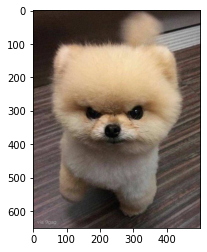

In [3]:
plt.imshow(img) # 3 채널이 있으면 기본 RGB

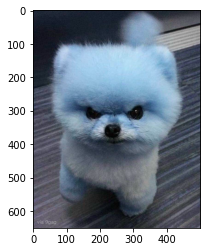

In [4]:
plt.imshow(img[...,::-1]) #RGB로 읽기 때문에 BGR인경우 해당 이미지와같이 보여줌 

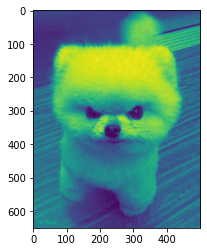

In [15]:
plt.imshow(img[:,:,0]) # 1가지 채널인 경우 색상 정보가 없어서 default 색상으로 보여줌

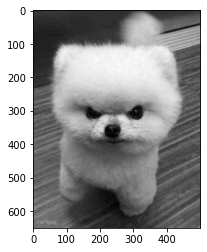

In [12]:
plt.imshow(img[:,:,0],cmap='gray') #color map으로 색상 설정

In [16]:
plt.cm.Greys_r #color map

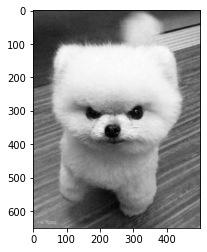

In [17]:
plt.imshow(img[:,:,0],cmap=  plt.cm.Greys_r ) 

In [3]:
import numpy as np
img_r =np.zeros_like(img) #이미지와 동일한 크기의 0으로 채워진 행렬  

In [4]:
img_r.dtype

dtype('uint8')

In [5]:
img_r.shape           #크기 동일

(651, 500, 3)

In [6]:
img[:,:,0] #첫번째 채널

array([[ 63,  61,  57, ...,  54,  54,  54],
       [ 63,  60,  57, ...,  54,  54,  54],
       [ 60,  55,  54, ...,  51,  52,  53],
       ...,
       [109, 101, 113, ..., 123, 125, 124],
       [112, 105, 116, ..., 117, 115, 115],
       [114, 107, 118, ..., 108, 105, 104]], dtype=uint8)

In [8]:
img_r[...,0]=img[:,:,0] #RGB의 R 값 뽑아서 원래이미지의

In [11]:
img[:,:,0].shape   , img_r.shape

((651, 500), (651, 500, 3))

In [12]:
img_r #r channel 에만 숫자값이 있고 나머지 0

array([[[ 63,   0,   0],
        [ 61,   0,   0],
        [ 57,   0,   0],
        ...,
        [ 54,   0,   0],
        [ 54,   0,   0],
        [ 54,   0,   0]],

       [[ 63,   0,   0],
        [ 60,   0,   0],
        [ 57,   0,   0],
        ...,
        [ 54,   0,   0],
        [ 54,   0,   0],
        [ 54,   0,   0]],

       [[ 60,   0,   0],
        [ 55,   0,   0],
        [ 54,   0,   0],
        ...,
        [ 51,   0,   0],
        [ 52,   0,   0],
        [ 53,   0,   0]],

       ...,

       [[109,   0,   0],
        [101,   0,   0],
        [113,   0,   0],
        ...,
        [123,   0,   0],
        [125,   0,   0],
        [124,   0,   0]],

       [[112,   0,   0],
        [105,   0,   0],
        [116,   0,   0],
        ...,
        [117,   0,   0],
        [115,   0,   0],
        [115,   0,   0]],

       [[114,   0,   0],
        [107,   0,   0],
        [118,   0,   0],
        ...,
        [108,   0,   0],
        [105,   0,   0],
        [104,   0,   0]]

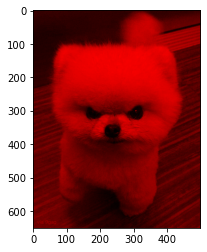

In [18]:
plt.imshow(img_r)  #실제 R 채널에서 가져온 이미지

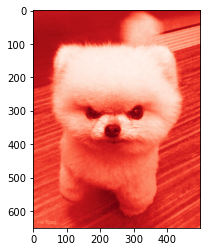

In [19]:
plt.imshow(img[:,:,0],cmap='Reds_r') #intensity 보기용, 밝은부분이 해당 값이 많은 부분

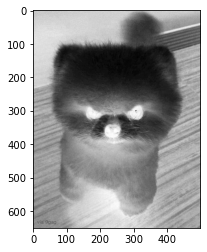

In [22]:
plt.imshow(img[:,:,0],cmap='gray_r') #어두운 색상이 붉은 색상이 가장 많음

In [14]:
from skimage import io

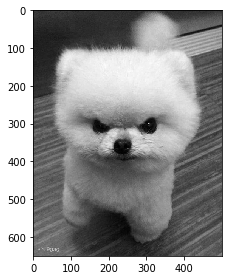

In [15]:
io.imshow(img[...,0])  #채널이 하나만 있기때문에 skimage는 기본 흑백으로 보여줌 

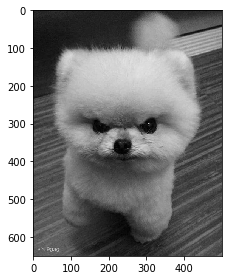

In [20]:
io.imshow(img[...,1])  #채널이 하나만 있기때문에 skimage는 기본 흑백으로 보여줌 

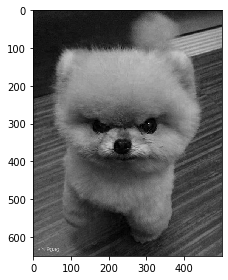

In [24]:
io.imshow(img[...,2])  #채널이 하나만 있기때문에 skimage는 기본 흑백으로 보여줌 

### Monkey patch
- 몽키 /게릴라/고릴라/잠수함 패치로 불림
- 기능이 import 한거에 따라서 달라지면서 **몰래 기능을 추가**

In [1]:
#버전마다 갯수 상이
import matplotlib

In [2]:
len(dir(matplotlib)) # 100

100

In [3]:
import matplotlib.pyplot as plt  #matplotlib +pyplot 기능

In [4]:
len(dir(matplotlib)) #159

159

- 정확한 색상보다 상대적인 색상 보는것이 더 중요

## 도형 그리기

### ImageDraw
- 이전시간에는 mutable technique 설명하기 위해서 언급
- 이번에는 도형 그리기
    -  이미지 라벨링(bounding box) 그릴때 유용

### Mutable Technique 
- ImageDraw의 Mutable technique 으로 다룸

결과물 함수, 메소드 종류 

1.  자기 자신이 변경됨
    - return None
    - 예.`append`
2. 자기 자신 변경됨
    - return 
    - 예.`pop`
3. 자기자신 변경 없음 
    - return
    - 예. `index`
    
이러한 문제로 tensorflow 에서는 immutalbe 로 만듦

In [18]:
a=[1,2,3]
a.append(4) #return None (output  없음 )

In [19]:
a          #a 값 추가됨

[1, 2, 3, 4]

In [20]:
a.pop()  

4

In [21]:
a

[1, 2, 3]

In [22]:
a.index(1)  #변경 없음

0

In [23]:
a

[1, 2, 3]

#### 사각형 
- `draw.rectangle( ( x0,y0), (x1,y1))`
- 점 2개로 사각형 표현 가능

In [16]:
from PIL import Image
img=Image.open('dog.jpg')

In [17]:
from PIL import ImageDraw

In [18]:
draw=ImageDraw.Draw(img) #PIL로 이미지 불러서 객체 생성
draw

In [22]:
draw.rectangle(((20,20),(100,100)),width=5) # return None -> mutable 이기 때문에 이미지에 그려짐

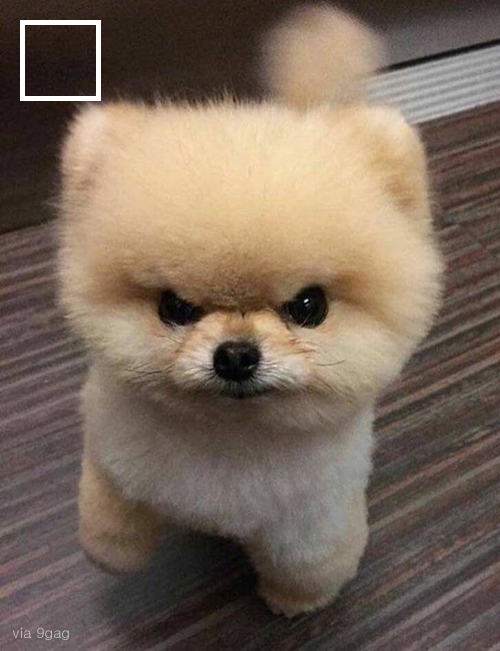

In [21]:
img 

In [23]:
dir(draw) #그릴수 있는 도형,도구

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_getink',
 '_multiline_check',
 '_multiline_split',
 'arc',
 'bitmap',
 'chord',
 'draw',
 'ellipse',
 'fill',
 'font',
 'fontmode',
 'getfont',
 'im',
 'ink',
 'line',
 'mode',
 'multiline_text',
 'multiline_textsize',
 'palette',
 'pieslice',
 'point',
 'polygon',
 'rectangle',
 'shape',
 'text',
 'textsize']

composition- 클래스 내부에 다른 클래스 인스턴스하여 처리
- self.draw.draw_rectangle

In [34]:
import inspect  #소스확인 
print(inspect.getsource(draw.rectangle))


    def rectangle(self, xy, fill=None, outline=None, width=0):
        """Draw a rectangle."""
        ink, fill = self._getink(outline, fill)
        if fill is not None:
            self.draw.draw_rectangle(xy, fill, 1)
        if ink is not None and ink != fill:
            self.draw.draw_rectangle(xy, ink, 0, width)



#### 원 그리기
- 타원형(ellpise)을 감싸는 사각형(bounding box)기준으로 그림을 그림
- 모두 동일한 크기로 맞추면 원
- `draw.ellipse( ( x0,y0), (x1,y1))`

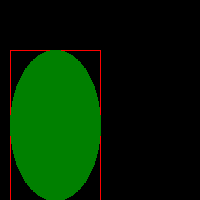

In [102]:
w, h = 200, 200
shape = [(10, 50), (100,200)] 
background = Image.new("RGB", (w, h)) 
img1 = ImageDraw.Draw(background)   
img1.rectangle(shape, outline ="red") 
img1.ellipse(shape, fill ="green", outline ="green")  
background

In [37]:
draw.ellipse(((100,100),(140,140)),width=1,fill='red') #output 없음

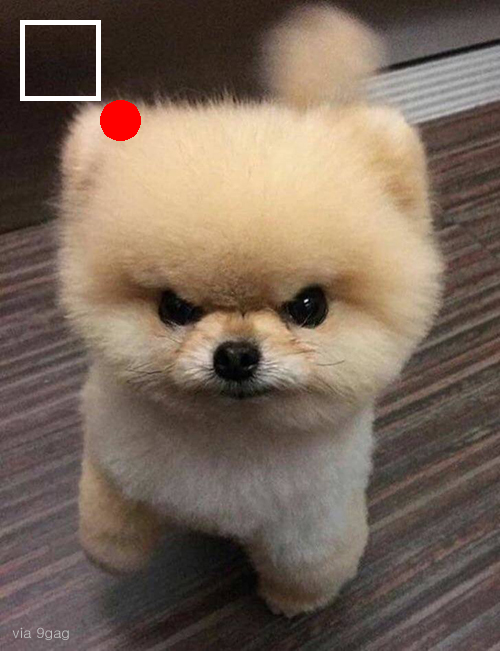

In [45]:
img

mutable이기 때문에 계속 반영되어서 다시 새로 불러와야함

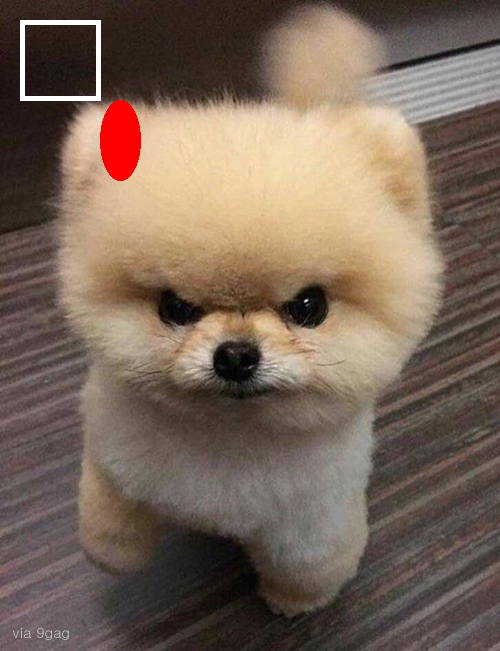

In [48]:
from PIL import Image
img2= Image.open('dog.jpg')
img3=img2
draw=ImageDraw.Draw(img2)
draw.rectangle(((20,20),(100,100)),width=5)
draw.ellipse(((100,100),(140,180)),width=1,fill='red') 
img3 #mutable이기 때문에 img3도 같이 변함

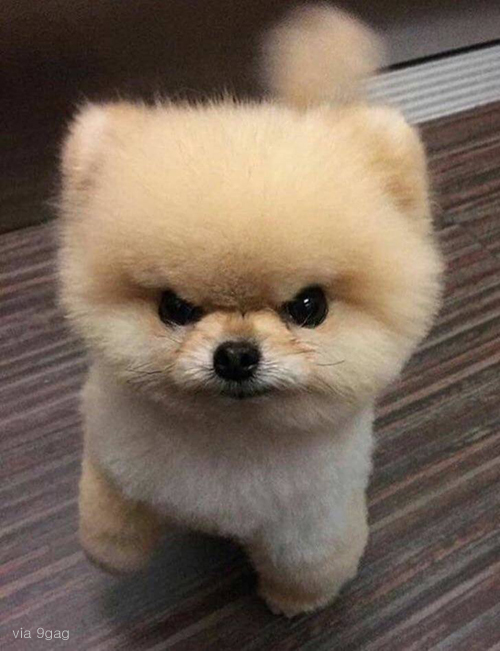

In [46]:
img2= Image.open('dog.jpg')
img3=img2.copy()            #copy하면 메모리 공유 안하므로 중간에 copy해놔야함
draw=ImageDraw.Draw(img2)
draw.rectangle(((20,20),(100,100)),width=5)
draw.ellipse(((100,100),(140,120)),width=1,fill='red') 
img3 

pandas 에서는 mutable 문제로 inplace옵션이 있음


---
### PIL
basic.pdf 2pg 참고
- 이미지 format 추가 -> format에 따라서 color space 가 달라지기 때문
jpeg, png 
- bit 방식
- 투명배경 지원
- 데이터 파일마다 지원하는 color space 영역이 다름
- 데이터 수집, 법적,윤리적 issue는 방법 안 배움

데이터 포맷별로 정리
- PIL에서 처리
    - Numpy 색상 채널도 알수 없음 meta data 인 header가 없어 값만 받기 때문에 채널을 알수 없기 때문  


- image format 

이미지 불러올때 확인해야할 것
1. format
2. mode
3. size

In [168]:
from PIL import Image

In [174]:
img1=Image.open('desktop/20200806_161241.jpg')

In [41]:
dir(img1) #format ,get colors, getchannel

['_Image__transformer',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_getmp',
 '_min_frame',
 '_new',
 '_open',
 '_repr_png_',
 '_seek_check',
 '_size',
 'alpha_composite',
 'app',
 'applist',
 'bits',
 'category',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'draft',
 'effect_spread',
 'encoderconfig',
 'encoderinfo',
 'entropy',
 'filename',
 'filter',
 'for

(4021,3024)인 이미지가 RGB채널로 구성되고 확장명은JPEG

In [175]:
img1.format

'JPEG'

In [176]:
img1.format_description

'JPEG (ISO 10918)'

In [177]:
img1.mode

'RGB'

In [178]:
img1.size

(4032, 3024)

In [180]:
img1.info.keys() #exif , dpi(dot per inches )->interpolation

dict_keys(['exif', 'dpi'])

In [181]:
img1.info['dpi'] #각 필셀크기가 1인치당 72,72(출력 기준)

(72, 72)

In [183]:
dir(img1.getexif()) #__iter__ ->iterable; itmes,pop, keys -> dictionary

['_MutableMapping__marker',
 '__abstractmethods__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_data',
 '_fixup',
 '_fixup_dict',
 '_get_ifd_dict',
 '_ifds',
 '_info',
 '_loaded_exif',
 'clear',
 'endian',
 'fp',
 'get',
 'get_ifd',
 'head',
 'items',
 'keys',
 'load',
 'pop',
 'popitem',
 'setdefault',
 'tobytes',
 'update',
 'values']

### meta data
- meta data(데이터의 데이터) 의 표준이 많은데 그 중 하나가 EXIF

#### \_getexif
- EXIF (EXchangable Image File format)
- 디지털 카메라에서 이용되는 이미지 파일 포맷으로 사진의 metatdata 포함 
    - 사진에 대한 추가적인 표준 정보를 얻을 수 있음 

In [97]:
img1._getexif() # 찍은 날짜, 사진 촬영한 기기, 위치 등 관련 정보 있음 

{36864: b'0220',
 37121: b'\x01\x02\x03\x00',
 37377: 11.73,
 36867: '2020:08:06 16:12:41',
 36868: '2020:08:06 16:12:41',
 37378: 1.53,
 37379: 9.34,
 37380: 0.0,
 37381: 1.53,
 37383: 5,
 37385: 0,
 37386: 4.3,
 37510: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 40961: 1,
 40962: 4032,
 41990: 0,
 37520: '0726',
 37521: '0726',
 37522: '0726',
 40963: 3024,
 271: 'samsung',
 272: 'SM-N950N',
 274: 1,
 531: 1,
 33434: 0.0002941176470588235,
 40965: 920,
 282: 72.0,
 33437: 1.7,
 41729: b'\x01\x00\x00\x00',
 283: 72.0,
 42016: 'G12LLKA02SM G12LLKL01GM\n',
 34850: 2,
 34853: {0: b'\x02\x02\x00\x00',
  1: 'N',
  2: (37.0, 13.0, 9.0),
  3: 'E',
  4: (127.0, 5.0, 3.0),
  5: b'\x00',
  6: 87.0,
  7: (7.0, 12.0, 40.0),
  29: '2020:08:06'},
 34855: 40,
 296: 2,
 41986: 0,
 40960: b'0100',
 41987: 0,
 305: 'N950NKSU5DTG1',
 306: '2020:08:06 16:12:41',
 41988: nan,
 41989: 26,
 41992: 0,
 41993: 0,
 41994: 0,
 34665: 214,
 37500: b'\x07\x00\x01\x00\x07\x00\x04\x00\x00\x000100\x02\

In [104]:
img1._getexif()[37121] #byte

b'\x01\x02\x03\x00'

한글은 유니코드로 표현해야 모든 글자를 표현할 수 있음

### encode
- 특정 문자열을 숫자로 변환
- cp949, utf-8  방식으로 정의되어있는 문자와 숫자 매핑에 따라서 숫자로 변환
    -  label encoding, one-hot encoding 문자 ->숫자 변환

### decode
- 숫자를 문자로 변환함 <>  encode
- 무슨 방식인지 알아야함

한글 
- euc-kr
- utf-8 

무슨 방식으로 바뀌어 있는지 알아야함.

In [153]:
import binascii
print(binascii.hexlify(img1._getexif()[37121]).decode('ascii'))

#img1._getexif()[37121].decode('utf-16')

01020300


In [114]:
str(img1._getexif()[37121] ,'utf-8')#  16진수에 맞는 unicode 

'ȁ\x03'

 16진수  \x....

In [147]:
img1._getexif()[37121].decode('utf-8') #byte -> str

'\x01\x02\x03\x00'

In [112]:
img.info #파일마다 갖고있는 정보가 상이함

{'jfif': 258,
 'jfif_version': (1, 2),
 'dpi': (96, 96),
 'jfif_unit': 1,
 'jfif_density': (96, 96),
 'exif': b'Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x07\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00b\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00j\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x14\x00\x00\x00r\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\x86\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\x9c\x00\x00\x00\xc8\x00\x00\x00`\x00\x00\x00\x01\x00\x00\x00`\x00\x00\x00\x01Adobe Photoshop 7.0\x002020:03:28 15:27:12\x00\x00\x00\x00\x03\xa0\x01\x00\x03\x00\x00\x00\x01\xff\xff\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x01\xf4\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x02\x8b\x00\x00\x00\x00\x00\x00\x00\x06\x01\x03\x00\x03\x00\x00\x00\x01\x00\x06\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x01\x16\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x01\x1e\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x01\x00\x04\x00\x00\x00\

In [111]:
img1.info

{'exif': b'Exif\x00\x00II*\x00\x08\x00\x00\x00\x0b\x00\x0f\x01\x02\x00\x08\x00\x00\x00\xa2\x00\x00\x00\x10\x01\x02\x00\t\x00\x00\x00\xaa\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\x92\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\x9a\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x00\x0e\x00\x00\x00\xb4\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xc2\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\xd6\x00\x00\x00%\x88\x04\x00\x01\x00\x00\x00\xb6\x03\x00\x00\x84\x04\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00samsung\x00SM-N950N\x00\x00N950NKSU5DTG1\x002020:08:06 16:12:41\x00$\x00\x9a\x82\x05\x00\x01\x00\x00\x00\x8c\x02\x00\x00\x9d\x82\x05\x00\x01\x00\x00\x00\x94\x02\x00\x00"\x88\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\'\x88\x03\x00\x01\x00\x00\x00(\x00\x00\x00\x00\x90\x07\x00\x04\x00\x00\x000220\x03\x90\x02\x00\x14\x00\x00\x00\x9c\x02\x00\x00\x04\x90\x02\x00\x14\

- info, format 확장 포맷별로 묶어줘야함

## 확장자
-  특징, color space 상이함
-  이미지 파일 형식
    - BMP
    - JPG/JPEG
    - GIF
    - PNG
    - TIFF

In [45]:
img.format #format 결과 없음 

'JPEG'

In [47]:
img.format_description

'JPEG (ISO 10918)'

In [46]:
img._exif # Private처럼 씀   

In [88]:
img._getexif() # meta data 가 있음

{40961: 65535,
 40962: 500,
 40963: 651,
 296: 2,
 34665: 156,
 305: 'Adobe Photoshop 7.0',
 274: 1,
 306: '2020:03:28 15:27:12',
 282: 96.0,
 283: 96.0}

In [89]:
img.get_format_mimetype() 

'image/jpeg'

In [108]:
img.info #information  =jpg 관련 정보

{'jfif': 258,
 'jfif_version': (1, 2),
 'dpi': (96, 96),
 'jfif_unit': 1,
 'jfif_density': (96, 96),
 'exif': b'Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x07\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00b\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00j\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x14\x00\x00\x00r\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\x86\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\x9c\x00\x00\x00\xc8\x00\x00\x00`\x00\x00\x00\x01\x00\x00\x00`\x00\x00\x00\x01Adobe Photoshop 7.0\x002020:03:28 15:27:12\x00\x00\x00\x00\x03\xa0\x01\x00\x03\x00\x00\x00\x01\xff\xff\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x01\xf4\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x02\x8b\x00\x00\x00\x00\x00\x00\x00\x06\x01\x03\x00\x03\x00\x00\x00\x01\x00\x06\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x01\x16\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x01\x1e\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x01\x00\x04\x00\x00\x00\

### getdata
- 각 색상 정보

In [93]:
list(img.getdata()) #channel

[(63, 46, 39),
 (61, 44, 37),
 (57, 40, 33),
 (56, 39, 32),
 (60, 43, 36),
 (59, 42, 35),
 (55, 38, 31),
 (58, 41, 34),
 (60, 43, 36),
 (59, 42, 35),
 (58, 41, 34),
 (56, 42, 33),
 (55, 41, 32),
 (56, 42, 33),
 (53, 39, 30),
 (54, 41, 32),
 (52, 38, 29),
 (53, 39, 30),
 (54, 40, 31),
 (51, 37, 28),
 (53, 39, 30),
 (57, 43, 34),
 (56, 42, 33),
 (55, 41, 32),
 (55, 41, 32),
 (55, 41, 32),
 (57, 43, 34),
 (50, 36, 27),
 (46, 32, 23),
 (51, 37, 28),
 (54, 40, 31),
 (56, 42, 33),
 (52, 38, 29),
 (51, 32, 26),
 (55, 31, 27),
 (55, 34, 29),
 (58, 37, 32),
 (60, 39, 34),
 (55, 34, 29),
 (53, 32, 27),
 (56, 35, 30),
 (63, 42, 37),
 (66, 45, 40),
 (63, 44, 38),
 (58, 41, 34),
 (54, 39, 32),
 (51, 36, 29),
 (48, 33, 26),
 (50, 35, 28),
 (49, 34, 27),
 (51, 36, 29),
 (55, 40, 33),
 (60, 45, 38),
 (58, 43, 36),
 (55, 40, 33),
 (50, 36, 27),
 (49, 35, 26),
 (55, 41, 32),
 (61, 47, 38),
 (60, 46, 37),
 (56, 42, 33),
 (58, 44, 35),
 (59, 45, 36),
 (58, 44, 35),
 (58, 44, 35),
 (55, 41, 32),
 (54, 40, 

- 크기와 상관 없이 색상 양에 따라서 이미지 파일 크기가 달라짐 
- 압축을 하면 비슷한것들이 많으면 압축됨
- matplotlib
    - imread에서 압축한 것을 **해석**해서 Numpy foramt 으로 변경해줌

---
### png
- 투명배경 추가 가능 


### 4채널

In [116]:
sun= Image.open('desktop/sun.png')

In [117]:
sun.format #PNG

'PNG'

In [118]:
sun.format_description

'Portable network graphics'

In [119]:
sun._getexif()

In [ ]:
sun.info

In [120]:
sun.split() #channels 4개로 분리 

(<PIL.Image.Image image mode=L size=3381x1494 at 0x19B364CA100>,
 <PIL.Image.Image image mode=L size=3381x1494 at 0x19B364CA340>,
 <PIL.Image.Image image mode=L size=3381x1494 at 0x19B364CA070>,
 <PIL.Image.Image image mode=L size=3381x1494 at 0x19B364CA130>)

In [122]:
sun.size #shape Numpy

(3381, 1494)

In [128]:
dir(sun)

['_Image__transformer',
 '_PngImageFile__fp',
 '_PngImageFile__frame',
 '_PngImageFile__idat',
 '_PngImageFile__prepare_idat',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close__fp',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_min_frame',
 '_new',
 '_open',
 '_repr_png_',
 '_seek',
 '_seek_check',
 '_size',
 '_text',
 'alpha_composite',
 'category',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'def

In [135]:
import numpy as np
np.array(sun).shape #4 channels

(1494, 3381, 4)

In [127]:
sun.getchannel

<bound method Image.getchannel of <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=3381x1494 at 0x19B36B5C460>>

### 1채널
- 단색 채널

In [137]:
logo=Image.open('logo.png')

In [ ]:
len(logo.split) #1개

In [ ]:
logo.split[0]

In [ ]:
logo.size, logo.format, logo.format  #핵심 3가지 

In [ ]:
logo.split #mode

##### mode
- PIL 이 지정한 방식이라서 Numpy 에서는 meta data 없어서 모름
- 이미지내의 픽셀의 깊이와 타입 정의함
- P (8-bit pixels, mapped to any other mode using a color palette)
    - 고유 색상 팔레트를 만들어서 채널로 만듦( 8-bit pixels 0 ~ 255)
    - PIL이 압도적
- color space, type 구분 

Pillow 참고 : https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes


skimage 에서 도움 받아야함, PIL, openCV 써야함 (정보가 훨씬 작음)

In [154]:
logo.mode #하나의 채널로 표현한것

'P'

In [138]:
logo.split() #channel 1개이지만 색상 있음 ; mode= P => ??

(<PIL.Image.Image image mode=P size=900x352 at 0x19B3DDFC3A0>,)

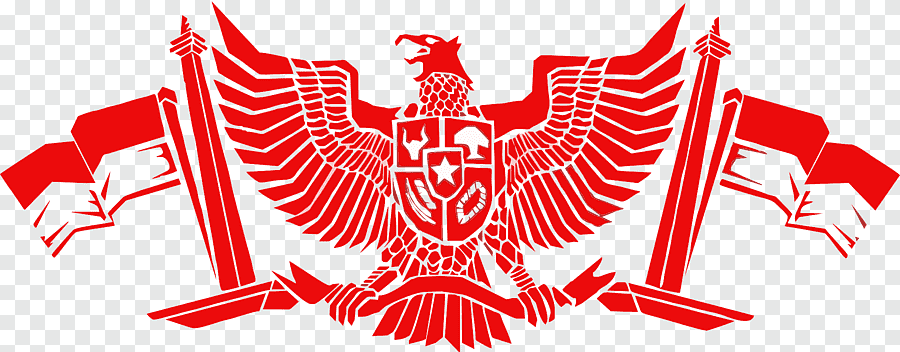

In [139]:
logo #단색 채널

## channel
- 이미지 색상 정보 하나하나이며 format 에 따라 달라짐
- PIL (가로, 세로 , channel )
DL ,tf
- channel_first
    - (channel, batch_size , 세로, 가로)

- channel_last (기본)
    - (batch_size  , 세로, 가로 , channel)

In [49]:
import tensorflow as tf
tf.keras.backend.image_data_format() #channel_last

'channels_last'

#### 채널 순서
- 데이터 타입마다 프레임워크마다 데이터 해석하는 방법이 다름
    - 일반적으로 RGB
    - OpenCV  BGR ,  자주 사용하기 때문에 알아야함
    
   - skimage, openCV -> Numpy 형태
   - PIL :numpy 포맷 아니기 때문에 기본적으로 다양한 정보 제공
   
   이미지에대한 정보를 얻기위해서
   데이터 전처리에 필수임.
   1. 정보제공
   2. PIL 이 tf, pytorch 에 기본 이미지 처리 라이브러리로 사용됨
   
## opecv
- Numpy format
- BGR channel

In [48]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [164]:
import cv2
img_opencv= cv2.imread('dog.jpg')

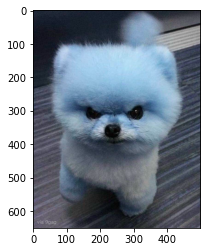

In [165]:
plt.imshow(img_opencv) #RGB 그림을 BGR 로 가져와서 색상이 바뀌어서 나옴

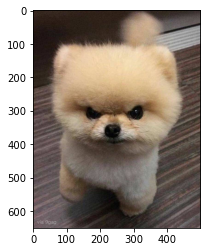

In [166]:
plt.imshow(img_opencv[...,::-1]) #BGR 로 순서 역변환하면 RGB

채널을 layer 처럼 사용함
- photoshop layers 에서 두 이미간의 특징을 골라서 옵션 선택하여 변경
- 다음시간에

### ImageChops
- Channel Operations
- 이미지간의 연산
- 이미지간의 특징에 대한 다양한 옵션이 있음 
    - 전통적인 기법에서 많이 사용됨

In [185]:
from PIL import ImageChops #channel operations

### Numpy 그림 그리기
- DrawImage 로 그림그린거 기억나시나요?
- Numpy 로 좌표측 그려서 vectorization 으로 그림  

#### 좌표축 만들기
- `meshgrid`
- `ix_`
- `atleast_2d`
- `ogrid`

#### meshgrid 
- matlba에서 차용하였으며 좌표벡터를 이용하여서 좌표 행렬을 만들어 좌표축 만들때 사용
- `meshgrid(*xi, **kwargs)` 가변 포지셔널 - 갯수 상관 없음

In [62]:
import numpy as np
a= np.arange(0,3)
b=np.array([0,10,20,30])

In [63]:
np.meshgrid(a)  # 인자 1개

[array([0, 1, 2])]

In [64]:
np.meshgrid(a,b) # 인자 2개 -

[array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[ 0,  0,  0],
        [10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]])]

In [65]:
x,y=np.meshgrid(a,b)  #unpacking

In [68]:
x+y #좌표축 만들때 사용 (matlab 에서 차용)

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

#### broadcasting
- 크기가 다른 vector를  broadcasting 이용해서 행렬을 만들어서 meshgrid와 동일하게 만들어줌
    - `ix_`
    - `atleast_2d`
    - `ogrid`

In [69]:
np.ix_(a,b)

(array([[0],
        [1],
        [2]]),
 array([[ 0, 10, 20, 30]]))

In [89]:
x,y=np.ix_(a,b)

In [90]:
x+y  # 위의 x+y의 transpose(전치)

array([[ 0, 10, 20, 30],
       [ 1, 11, 21, 31],
       [ 2, 12, 22, 32]])

In [93]:
x,y=np.ix_(b,a) #meshgrid(a,b) 와 동일

In [92]:
x+y

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [79]:
np.atleast_2d(a,b)

[array([[0, 1, 2]]), array([[ 0, 10, 20, 30]])]

In [74]:
x,y=np.atleast_2d(a,b)

In [76]:
x+y.T  #전치행렬  동일해짐

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [94]:
x,y= np.ogrid [0:100,0:100] #쪼개서 broadcasting 

In [95]:
x+y #

array([[  0,   1,   2, ...,  97,  98,  99],
       [  1,   2,   3, ...,  98,  99, 100],
       [  2,   3,   4, ...,  99, 100, 101],
       ...,
       [ 97,  98,  99, ..., 194, 195, 196],
       [ 98,  99, 100, ..., 195, 196, 197],
       [ 99, 100, 101, ..., 196, 197, 198]])

#### 그림 그리기
- 이미지에 그림 그리고 싶은 부분을 동일한 크기의 mask 만들어서 표시
- 내부적으로 vector 연산을 통해서 그림


In [222]:
mask=2*x-y==0 #   2x - y = 0 인 값만 True ,나머지 False

In [223]:
mask #True 인 부분만 남김

array([[ True, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [226]:
grid= np.ones_like((x+y)) #x+y 행렬과 동일한 크기의 행렬에서 1로 채워짐

In [227]:
grid

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [228]:
grid[mask]=255   #1로 채워진 행렬에서 mask에서 True인 값부분만 255로 변경 
grid

array([[255,   1,   1, ...,   1,   1,   1],
       [  1,   1, 255, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       ...,
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1]])

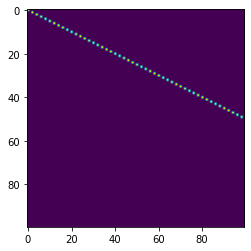

In [229]:
plt.imshow(grid)  #2x=y

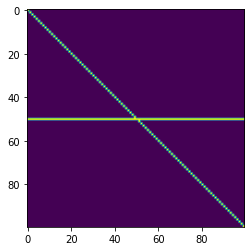

In [101]:
mask= (x-y ==0)|(x==50)
grid= np.ones_like((x+y)) 
grid[mask]=255
plt.imshow(grid) #x=y , x=50인 인 여러개의 점으로 이루어진 선 그리기

원의 방정식 
$(x−a)^2 +(y−b)^2 =r^2 $
 - 차원 직교 좌표계에서 중심이 O(a,b), 반지름의 길이가 $r$ 인 원

 

- 중점 (10,10)
- 반지름이 $\sqrt 10$ 보다 작음(내부를 채우기 위해서 다음과 같이 조건을 줌)

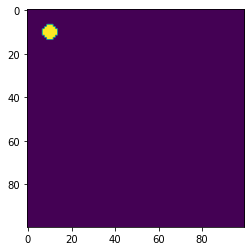

In [234]:
mask1= (x-10)*(x-10)+(y-10)*(y-10) <= 10 # 식만들어서 그림을 붙임
grid= np.ones_like((x+y))
grid[mask1]=255
plt.imshow(grid) 

- 중점 (50,50) 
- 반지름이 10 보다 작음

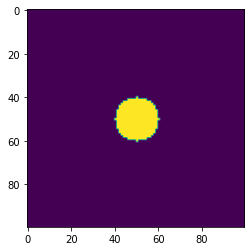

In [99]:
mask1= (x-50)*(x-50)+(y-50)*(y-50) <= 1010 
grid= np.ones_like((x+y))
grid[mask1]=255
plt.imshow(grid) 

 GAN

1. ML사용하지 않고 이미지 생성할때 입력값에 따라서 이미지 생성 가능
    - 예. 딥러닝 기법중에서 학습을 통하지 않고 글을 그림으로 표현하는 생성 모델
2. 라벨링시 object detection 이미지 크기에 맞게 bounding box 그림그려줌
